http://library.jsce.or.jp/jsce/open/00039/201506_no51/pdf/400.pdf

ここの再現を行う．

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import rich.traceback

In [2]:
rich.traceback.install(show_locals=True)
from pathlib import Path
import os

if (pwd := Path.cwd()).stem == 'test':
    os.chdir(pwd.parent)

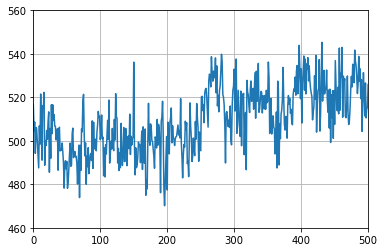

In [3]:
# dataset 1 の作成
def make_dataset_1():
    r"""ARMA モデルにしたがって時系列データ $x_t$ を発生させる．

    $$
    z_t = \alpha z_{t-1} + \epsilon_t + \beta \epsilon_{t-1}
    \\
    x_t = z_t + \mu_t
    $$

    ただし $z_0 = 0, \epsilon_0 = 0$ とした．

    Returns
    -------
    x_t: 長さ 501 の信号
    """
    def get_mu(time):
        if time == 150:
            return 535
        if time > 250:
            return 520
        else:
            return 500

    T = 501
    x = np.zeros(T)
    z_t = 0.0
    eps_t = np.random.normal(0, 10)
    alpha = 0.8
    beta = -0.6

    # if t = 0
    z_t = eps_t
    x[0] = z_t + get_mu(0)
    # otherwise
    for t in range(1, T):
        z_t = alpha * z_t
        z_t += beta * eps_t
        eps_t = np.random.normal(0, 10)
        z_t += eps_t

        x[t] = z_t + get_mu(t)

    return x

data1 = make_dataset_1()

plt.plot(data1)
plt.ylim(460, 560)
plt.xlim(0, 500)
plt.grid()
plt.show()

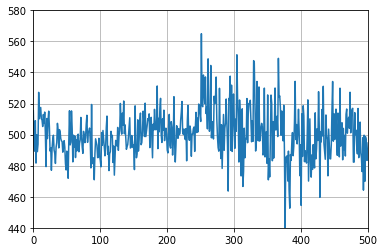

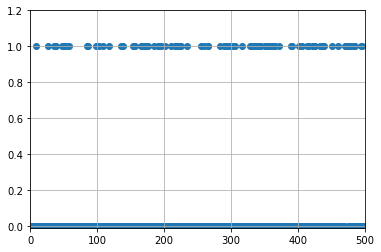

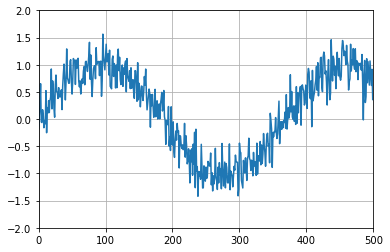

In [4]:
# dataset 2 の作成
def make_dataset_2():
    r"""ARMAX モデルにしたがって時系列データ $x_t$ を発生させる．

    $$
    z_t = \alpha z_{t-1} + \epsilon_t + \beta \epsilon_{t-1}
    \\
    x_t = z_t + \mu + \gamma_1 \xi_{1t} + \gamma_2 \xi_{2t}
    $$

    Returns
    -------
    x: 長さ 501 の信号
    xi_1: 1 つ目の外生変数 (0 or 1)
    xi_2: 2 つ目の外生変数
    """
    def get_sigma(t):
        if t > 250:
            return 20
        else:
            return 10

    T = 501
    x = np.zeros(T)
    mu = 500
    alpha = 0.8
    beta = -0.6
    gamma_1 = 6.0
    gamma_2 = -4.0

    xi_1 = stats.bernoulli.rvs(0.2, size=T)
    xi_2 = np.sin(0.017 * np.arange(T)) + np.random.normal(0, 0.25, size=T)

    # if t = 0
    eps_t = np.random.normal(0, get_sigma(0))
    z_t = eps_t
    x[0] = z_t + mu + gamma_1 * xi_1[0] + gamma_2 * xi_2[0]
    # otherwise
    for t in range(1, T):
        z_t = alpha * z_t
        z_t += beta * eps_t
        eps_t = np.random.normal(0, get_sigma(t))
        z_t += eps_t

        x[t] = z_t + mu + gamma_1 * xi_1[t] + gamma_2 * xi_2[t]

    return x, xi_1, xi_2

data2, xi1, xi2 = make_dataset_2()
plt.plot(data2)
plt.xlim(0, 500)
plt.ylim(440, 580)
plt.grid()
plt.show()
plt.scatter(np.arange(len(xi1)), xi1)
plt.xlim(0, 500)
plt.ylim(-0.01, 1.2)
plt.grid()
plt.show()
plt.plot(xi2)
plt.xlim(0, 500)
plt.ylim(-2, 2)
plt.grid()
plt.show()

作成した ARMAX が正常に動作するか確認する．

In [5]:
from changefinder import ARMAXusingSMC, SMCARMAX

C:\Users\siitake\miniconda3\envs\dev_changefinder\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [ ]:
model = SMCARMAX(p=1, q=1, m=0, num_particle=100)


In [6]:
model = SMCARMAX(p=1, q=1, m=0, num_particle=100)
preds = list()
ave_preds = list()
for x in tqdm(data1):
    p = model.predict()
    p_hat = model.update(x)

    preds.append(p)
    ave_preds.append(p_hat)

res = pd.DataFrame()
res['pred'] = preds
res['next_pred'] = ave_preds

  0%|          | 1/501 [00:00<00:00, 999.83it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ C:\Users\siitake\AppData\Local\Temp/ipykernel_13648/671051312.py:6 in <module>            │
│                                                                                           │
│ [Errno 2] No such file or directory:                                                      │
│ 'C:\\Users\\siitake\\AppData\\Local\\Temp/ipykernel_13648/671051312.py'                   │
│ c:\Users\siitake\Documents\GitHub\changefinder\changefinder\smcarmax.py:85 in update      │
│                                                                                           │
│   82 │   │   self.exog = exog                                                             │
│   83 │   │   next_pred = self.predict(exog)                                               │
│   84 │   │   preds, weights = self.params.update(obs)                                     │
│ ❱ 85 │   │   self.params.resampling(preds, weights)                                       │
│   86 │   │   return np.average(next_pred, weights=weights, axis=0)                        │
│   87                                                                                      │
│                                                                                           │
│ ╭─────────────────────────────────────── locals ───────────────────────────────────────╮  │
│ │      exog = None                                                                     │  │
│ │ next_pred = array([[ 274.98791858,  273.44756608,  271.79427377, ...,  270.82644417, │  │
│ │             │   │    273.7483822 ,  274.46724854],                                   │  │
│ │             │      [-700.45249971, -707.54640011, -708.32215667, ..., -706.02310479, │  │
│ │             │   │   -702.02248073, -704.01169747],                                   │  │
│ │             │      [ 802.35809733,  803.81628574,  801.68918338, ...,  798.95745835, │  │
│ │             │   │    801.29697874,  803.47802711],                                   │  │
│ │             │      ...,                                                              │  │
│ │             │      [-632.56382056, -639.26925307, -640.10639282, ..., -638.03585766, │  │
│ │             │   │   -634.11068714, -635.91047483],                                   │  │
│ │             │      [-289.48128755, -294.24133933, -295.38587557, ..., -294.45971305, │  │
│ │             │   │   -290.91240099, -291.76356039],                                   │  │
│ │             │      [-727.42044386, -734.66357015, -735.415747  , ..., -733.02891281, │  │
│ │             │   │   -728.99930405, -731.06128799]])                                  │  │
│ │       obs = 504.4513726145299                                                        │  │
│ │     preds = array([[-3.16639475e-01,  1.36538822e+00,  1.79930033e-01,               │  │
│ │             │   │   -8.28295146e-02],                                                │  │
│ │             │      [-2.29168676e+00,  4.05827026e-01, -2.00137761e+00,               │  │
│ │             │   │   -3.53490552e-01],                                                │  │
│ │             │      [-2.50897974e+00,  1.14077538e+00, -5.80672925e-01,               │  │
│ │             │   │   -1.98194380e+00],                                                │  │
│ │             │      [ 6.64628735e-02,  8.83548121e-01,  2.12781082e+00,               │  │
│ │             │   │    7.07258175e-01],                                                │  │
│ │             │      [ 1.07511963e+00,  9.02436521e-01, -7.27578831e-01,               │  │
│ │             │   │   -9.57580203e-01],                                                │  │
│ │             │      [ 1.29767917e+00,  1.56294992e+00,  5.20865332e-01,               │  │
│ │             │   │   -1.03980728e+00],           

In [6]:
# data1 のモデルの確認...
model = ARMAXusingSMC(p=1, q=1, M=0, n_particle=100)

In [7]:
# 逐次的な学習と予測
# NOTE: エラーが出るため一旦コメントアウト
#p = list()
#w = list()
#l = list()
#for x in tqdm(data1):
#    pp = model.predict()
#    p.append(pp)
#    ll, ww = model.update(x)
#    l.append(ll)
#    w.append(ww)
#p = np.array(p)
#l = np.array(l)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ C:\Users\siitake\AppData\Local\Temp/ipykernel_24896/1595372957.py:7 in <module>           │
│                                                                                           │
│ [Errno 2] No such file or directory:                                                      │
│ 'C:\\Users\\siitake\\AppData\\Local\\Temp/ipykernel_24896/1595372957.py'                  │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'p' is not defined

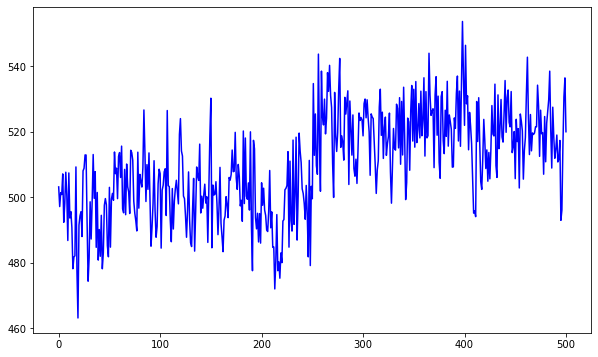

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(data1)), data1, color='blue', label='true')
ax.plot(np.arange(len(p)), p.reshape(-1), color='red', label='pred')
plt.legend()
plt.show()

In [9]:
pd.DataFrame(w).plot(ylim=(0, 5))

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ C:\Users\siitake\AppData\Local\Temp/ipykernel_24896/3921393937.py:1 in <module>           │
│                                                                                           │
│ [Errno 2] No such file or directory:                                                      │
│ 'C:\\Users\\siitake\\AppData\\Local\\Temp/ipykernel_24896/3921393937.py'                  │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'w' is not defined